## Pandas DataFrames I


### Programming for Data Science
### Last Updated: Jan 15, 2023
---  


### PREREQUISITES
- variables
- data types
- operators
- list comprehensions (not essential)
- numpy arrays (not essential)


### SOURCES 
- ten minutes to pandas  
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html


- sort_values()  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html


- value_counts()  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html


- to_csv() : saving to CSV file  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html


- read_csv() : load CSV file into DataFrame  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html


- dropna() : drop missing data  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html


- fillna() : impute missing data  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html




### OBJECTIVES
- Introduce pandas dataframes and the essential operations
 


### CONCEPTS

- DataFrame
- Creating DataFrames
- Copy: shallow vs deep
- Appending columns
- Slicing or subsetting by location, label (name)
- Boolean indexing
- Sorting
- Handling missing data
- Statistics

---

## I. Introduction to Pandas DataFrames

Pandas DataFrames were modeled from R Data Frames.

- They hold rectangular data (columns are equal length)
- Can hold mixed data types, but each column has same type
- Contains three attributes:
  - index (a column of index values; can use to sort, subset data)
  - columns
  - values (as a numpy array)

Pandas `Series` holds a single column of data.  

For shorthand, `df` will refer to pandas DataFrames.  

DataFrames can be created with pandas.    
Various formats (`csv`,`json`,...) can be loaded into DataFrames.   

The [ten minutes to pandas link](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) above gives a good, brief overview of pandas. Be sure to review.

Import pandas like this, where the alias `pd` is convention:

In [12]:
import pandas as pd

## II. Creating DataFrames

Several ways to create pandas dataframes

- Passing a dictionary of objects:

In [14]:
# x, y, z are lists in the dict

df = pd.DataFrame({'x':[0,2,1,5], 'y':[1,1,0,0], 'z':[True,False,False,False]})
df

,x,y,z
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


In [16]:
print('attributes of df:')
print('index          :', df.index)
print('columns        :', df.columns)
print('data           :\n', df.values)
print('               ')
print('type(df.values):', type(df.values))

attributes of df:
index          : RangeIndex(start=0, stop=4, step=1)
columns        : Index(['x', 'y', 'z'], dtype='object')
data           :
 [[0 1 True]
 [2 1 False]
 [1 0 False]
 [5 0 False]]
               
type(df.values): <class 'numpy.ndarray'>


In [18]:
list(df.columns)

['x', 'y', 'z']

In [20]:
list(df.index)

[0, 1, 2, 3]

- Passing the three required pieces:
  - columns as list
  - index as list
  - data as list of lists

In [15]:
df2 = pd.DataFrame(columns=['x','y'], index=['row1','row2','row3'], data=[[9,3],[1,2],[4,6]])#另一种创建datafram的方式
df2

,x,y
row1,9,3
row2,1,2
row3,4,6


## III. Copying DataFrames with `copy()`

Use `copy()` to give the new df a clean break from the original.  
Otherwise, the copied df will mirror changes in the original.

In [17]:
df_deep    = df.copy()  # deep copy; changes to df will not pass through
df_shallow = df         # shallow copy; changes to df will pass through

print('--df')
print(df)

# update values in df.x
df.x = 1

print('--Updated df')
print(df)
print('--df_shallow')
print(df_shallow)
print('--df_deep')
print(df_deep)

# rebuild df
df = pd.DataFrame({'x':[0,2,1,5], 'y':[1,1,0,0], 'z':[True,False,False,False]}) 

--df
   x  y      z
0  0  1   True
1  2  1  False
2  1  0  False
3  5  0  False
--Updated df
   x  y      z
0  1  1   True
1  1  1  False
2  1  0  False
3  1  0  False
--df_shallow
   x  y      z
0  1  1   True
1  1  1  False
2  1  0  False
3  1  0  False
--df_deep
   x  y      z
0  0  1   True
1  2  1  False
2  1  0  False
3  5  0  False


Notice `df_shallow` mirrors changes to `df`, since it references its indices and data.  
`df_deep` does not reference `df`, and so changes `to` df do not impact `df_deep`.

## IV. Show the data type of each column:

In [19]:
df.dtypes

x    int64
y    int64
z     bool
dtype: object

In [ ]:
?df.dtypes

## V. Column Renaming

Can rename one or more fields at once using a dict.  

Rename the field `z` to `is_label`:

In [21]:
df = df.rename(columns={'z':'is_label'})
df

,x,y,is_label
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


## VI. Column Referencing

Can use bracket notation or dot notation.  

- bracket notation: variable name must be a string

In [24]:
df['y']#第一列是index

0    1
1    1
2    0
3    0
Name: y, dtype: int64

- dot notation: variable is NOT a string.

In [22]:
# shows index and x values

df.y

0    1
1    1
2    0
3    0
Name: y, dtype: int64

show values only (can use dot or bracket notation):

In [26]:
df.y.values

array([1, 1, 0, 0], dtype=int64)

show only the first value, by indexing:

In [28]:
df.y.values[0]

1

**List comprehensions are very useful for selecting columns**

---

Brief aside on list comprehensions:  
- they take a list as input and return a list as output
- they transform each element
- they can apply one or more filters (if-statements)

In [ ]:
for x in lst:
    x**2
    #这种形式等价于[x**2 for x in lst]

In [25]:
# square values in list
lst = [1,2,3,4,5]

[x**2 for x in lst]

[1, 4, 9, 16, 25]

In [27]:
# keep odd values from list
lst = [1,2,3,4,5]
[x for x in lst if x % 2 == 1]

[1, 3, 5]

In [ ]:
# even
[x for x in lst if x % 2 == 0]

In [29]:
# squared evens
[x ** 2 for x in lst if x % 2 == 0]

[4, 16]

In [31]:
# retain elements containing 'ind'

f = ['f1_ind','f2_ind','f3_ind','f1','f2','f3']
[x for x in f if 'ind' in x]

['f1_ind', 'f2_ind', 'f3_ind']

In [30]:
df.columns

Index(['x', 'y', 'z'], dtype='object')

---

In [37]:
# create a new df by selecting columns that are NOT: x, y

df3 = df[[col for col in df.columns if col not in ['x','y']]]
df3

,is_label
0,True
1,False
2,False
3,False


In [39]:
df3 = df[[col for col in df.columns if col not in ['is_label']]]
df3

,x,y
0,0,1
1,2,1
2,1,0
3,5,0


### TRY FOR YOURSELF (UNGRADED EXERCISES)

1) Create a dataframe called `dat` by passing a dictionary of inputs. Here are the requirements:
- has a column named `features` containing floats
- has a column named `labels` containing integers 0, 1, 2  

Print the df.

In [45]:
dat = pd.DataFrame({'features':[0.1,1.1,2.1],'labels':[0,1,2]})
dat

,features,labels
0,0.1,0
1,1.1,1
2,2.1,2


In [ ]:
dat = pd.DataFrame({'features':[0.2,-1.1,1.6, 5.4], 'labels':[1,1,0,2]}) 
dat

2) Rename the `labels` column in `dat` to `label`.

In [47]:
dat.rename(columns={'labels':'label'})

,features,label
0,0.1,0
1,1.1,1
2,2.1,2


In [ ]:
dat = dat.rename(columns={'labels':'label'})
dat

## VII. Appending New Columns

It is typical to create a new column from existing columns.  
In this example, a new column (or field) is created by summing `x` and `y`:

In [51]:
df['x_plus_y'] = df.x + df.y
df

,x,y,is_label,x_plus_y
0,0,1,True,1
1,2,1,False,3
2,1,0,False,1
3,5,0,False,5


In [53]:
df.x_plus_y = df['x'] + df['y']
df

,x,y,is_label,x_plus_y
0,0,1,True,1
1,2,1,False,3
2,1,0,False,1
3,5,0,False,5


Notice the components:

- the left side has form: DataFrame name, bracket notation, new column name
- the assignment operator `=` is used
- the right side contains an expression; here, two df columns are summed 

Bracket notation also works on the fields, but it's more typing:

In [32]:
df['x_plus_y'] = df['x'] + df['y']
df

,x,y,z,x_plus_y
0,0,1,True,1
1,2,1,False,3
2,1,0,False,1
3,5,0,False,5


The bracket notation must be used when assigning to a new column. This will break:

In [34]:
df.'x_plus_y' = df.x + df.y

SyntaxError: invalid syntax (1004225935.py, line 1)

---

In [36]:
df.['x_plus_y'] = df.x + df.y#bracket和dot混搭也不行

SyntaxError: invalid syntax (1430220444.py, line 1)

## VIII. Load Iris Dataset to Illustrate More Functionality

The function `load_dataset()` in the `seaborn` package loads the built-in dataset.

In [6]:
import seaborn as sns

iris = sns.load_dataset('iris')

Check the data type of `iris`:

In [40]:
type(iris)

pandas.core.frame.DataFrame

**Always a good idea to inspect the data**

first few records:

In [61]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


last few records:

In [63]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris.tail(10)#last 10 records

Column data types

In [44]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

shape (rows, columns):

In [46]:
iris.shape

(150, 5)

alternatively, `len()` returns row (record) count:

In [48]:
len(iris)

150

column names:

In [50]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

dataframe index:

In [52]:
iris.index

RangeIndex(start=0, stop=150, step=1)

## IX. Subsetting

Pandas subsetting is very flexible. The flexibility is useful, but can be confusing.  
Regular practice will help.

Subsetting (or slicing) a dataframe produces a new dataframe.

Extract a column

In [59]:
iris.sepal_length.head()

# alternatively,
# iris['sepal_length'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

Extract subset of columns, saving into new df:

In [61]:
# desired columns are list of strings

lengths = iris[['sepal_length','petal_length']]#两个中括号创建子集
lengths.head(3)

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3


head() of data, as reminder

In [63]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### `iloc()`

Extracting rows using **indices** with `iloc()`. This fetches row 3, and all columns.

In [67]:
# first few records
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
iris.iloc[2]

sepal_length       4.7
sepal_width        3.2
petal_length       1.3
petal_width        0.2
species         setosa
Name: 2, dtype: object

fetch rows with indices 1,2 (the right endpoint is exclusive), and all columns.

In [73]:
iris.iloc[1:3]#数字代表的是indices，不是index

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


fetch rows with indices 1,2 and first three columns (positions 0, 1, 2)

In [67]:
iris.iloc[1:3, 0:3]

,sepal_length,sepal_width,petal_length
1,4.9,3.0,1.4
2,4.7,3.2,1.3


In [69]:
#first three column names

iris.columns[0:3]

Index(['sepal_length', 'sepal_width', 'petal_length'], dtype='object')

### `loc()`

Subsetting on a df can also be done with `loc()`. This uses the row, column labels (names).

Here we ask for rows with labels (indexes) 1-3, and it gives exactly that  
`iloc()` returned rows with indices 1,2.

In [71]:
iris.loc[1:3]

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [77]:
iris.iloc[1:3]#看一下区别

,sepal_length,sepal_width,petal_length,petal_width,species
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [75]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Subset on columns with column name (as a string) or list of strings

In [89]:
iris.loc[1:3, ['sepal_length','petal_width']]

,sepal_length,petal_width
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2


Select all rows, specific columns

In [80]:
iris.loc[:, ['sepal_length','petal_width']]

,sepal_length,petal_width
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0
148,6.2,2.3


In [82]:
df_cat = pd.DataFrame(index=['burmese','persian','maine_coone'],columns=['x'],data=[2,1,3])#创建一个新的dataframe
df_cat

,x
burmese,2
persian,1
maine_coone,3


In [86]:
df_cat.iloc[:2]

,x
burmese,2
persian,1


In [88]:
df_cat.iloc[0:1]

,x
burmese,2


In [90]:
df_cat.loc['burmese']

x    2
Name: burmese, dtype: int64

In [92]:
df_cat.loc[['burmese','maine_coone']]

,x
burmese,2
maine_coone,3


### Boolean Indexing: Subsetting based on Conditions

It's very common to subset a dataframe based on some condition on the data

In [75]:
# boolean mask

iris.sepal_length >= 7.5

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal_length, Length: 150, dtype: bool

In [77]:
iris[iris.sepal_length >= 7.5]

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica


In [97]:
# multiple conditions

iris[(iris['sepal_length']>=4.5) & (iris['sepal_length']<=4.7)]

,sepal_length,sepal_width,petal_length,petal_width,species
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
22,4.6,3.6,1.0,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
47,4.6,3.2,1.4,0.2,setosa


Illustrate the `Boolean mask` by assigning earlier condition to variable:

In [95]:
# show the sepal_length values

iris.sepal_length.values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [99]:
# assign the mask and show the bool values

mask = iris.sepal_length >= 7.5
mask.values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False,

In [101]:
# extract the True values

iris.sepal_length[mask].values

array([7.6, 7.7, 7.7, 7.7, 7.9, 7.7])

In summary, the mask will return True/False for each value.  
Subsetting on the mask will return only the values where mask value is True

## X. Working with Missing Data

Pandas primarily uses np.nan (from `numpy`) to represent missing data.

In [103]:
import numpy as np

df_miss = pd.DataFrame({'x':[2, np.nan, 1], 'y':[np.nan, np.nan, 6]})
df_miss

,x,y
0,2.0,NaN
1,NaN,NaN
2,1.0,6.0


**`dropna()` will drop missing**

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [105]:
# drop all missing data

df_drop_all = df_miss.dropna()
df_drop_all

,x,y
2,1.0,6.0


In [107]:
# drop records where column: x has np.nan

df_drop_x = df_miss.dropna(subset=['x'])
df_drop_x

,x,y
0,2.0,NaN
2,1.0,6.0


**`fillna()` fills missing**

Can fill with values, statistic. 

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

Example to impute each column with its median:

In [109]:
df_filled = df_miss.fillna(df_miss.median())
df_filled

,x,y
0,2.0,6.0
1,1.5,6.0
2,1.0,6.0


## XI. Sorting

Sort by values
- `by` parameter takes string or list of strings
- `ascending` takes True or False
- `inplace` will save sorted values into the df

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [111]:
iris.sort_values(by=['sepal_length','petal_width'])

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
135,7.7,3.0,6.1,2.3,virginica


Sort by index. Example sorts by descending index

In [113]:
iris.sort_index(axis=0, ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica
148,6.2,3.4,5.4,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica
146,6.3,2.5,5.0,1.9,virginica
145,6.7,3.0,5.2,2.3,virginica
...,...,...,...,...,...
4,5.0,3.6,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## XII. Statistical Summary of a DataFrame using `describe()`

In [115]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [117]:
iris.species.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [119]:
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

## XIII. Column Frequency using `value_counts()`

This is a highly useful function for showing the frequency for each distinct value.  
Parameters give the ability to sort by count or index, normalize, and more.  

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [121]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [123]:
# show percentages instead of counts

iris.species.value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

## XIV. Statistics

Operations generally exclude missing data.

Some of the stats are shown here.

In [127]:
iris.head()#展示一下数据

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [125]:
iris.sepal_length.mean()

5.843333333333334

In [129]:
iris.sepal_length.max()

7.9

In [ ]:
# standard deviation

iris.sepal_length.std()

Correlation (default=pearson) can be computed on two fields by subsetting on them:

In [ ]:
iris[['sepal_length','petal_length']].corr()

In [85]:
# corr on three columns

iris[['sepal_length','petal_length','sepal_width']].corr()

,sepal_length,petal_length,sepal_width
sepal_length,1.000000,0.871754,-0.11757
petal_length,0.871754,1.000000,-0.42844
sepal_width,-0.117570,-0.428440,1.00000


In [ ]:
# full correlation matrix

iris{}.corr()#会报错，因为最后一列是分类变量

In [99]:
# full correlation matrix
#如果除去最后一个分类变量，只是做前几列的相关

iris[['sepal_length','petal_length','sepal_width','sepal_width']].corr()

,sepal_length,petal_length,sepal_width,sepal_width
sepal_length,1.000000,0.871754,-0.11757,-0.11757
petal_length,0.871754,1.000000,-0.42844,-0.42844
sepal_width,-0.117570,-0.428440,1.00000,1.00000
sepal_width,-0.117570,-0.428440,1.00000,1.00000


In [131]:
iris.iloc[:,:4].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [101]:
iris.loc[:,[col for col in iris.columns if col not in ['species']]].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [97]:
iris.loc[:,['sepal_length','petal_length','sepal_width','sepal_width']].corr()

,sepal_length,petal_length,sepal_width,sepal_width
sepal_length,1.000000,0.871754,-0.11757,-0.11757
petal_length,0.871754,1.000000,-0.42844,-0.42844
sepal_width,-0.117570,-0.428440,1.00000,1.00000
sepal_width,-0.117570,-0.428440,1.00000,1.00000


## XV. Visualization

Scatterplot using `seaborn` on the df columns `sepal_length`, `petal_length`.

Visualization will be covered separately in more detail.

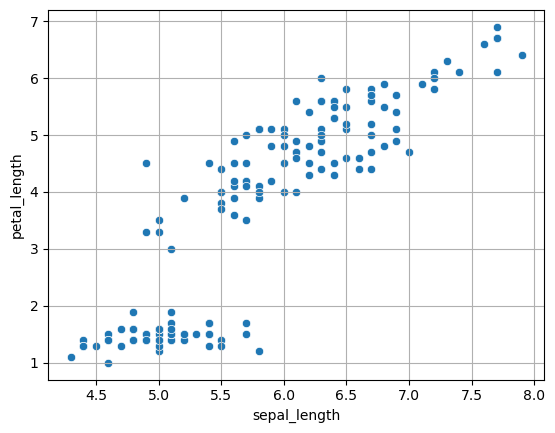

In [133]:
fig = sns.scatterplot(x=iris.sepal_length, y=iris.petal_length)
fig.grid()

## XVI. Save to CSV File

Common to save df to a csv file. The full path (path + filename) is required.  

Common optional parameters:
- `sep` - delimiter
- `index` - saving index column or not

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [121]:
iris.to_csv('./iris_data.csv')#这样保存的文件会多一列index

In [ ]:
iris.to_csv('./iris_data.csv',index=False)#去除index的第一列

## XVII. Deleting (Dropping) Columns

`del` can drop a DataFrame or single columns from the frame

In [8]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [24]:
del iris['sepal_width']

SyntaxError: invalid character '）' (U+FF09) (3997914533.py, line 1)

In [14]:
iris.head(2)

,sepal_length,petal_length,petal_width,species
0,5.1,1.4,0.2,setosa
1,4.9,1.4,0.2,setosa


`drop()` can drop one or more columns

takes `axis` parameter:
- axis=0 refers to rows  
- axis=1 refers to columns  

In [20]:
iris = iris.drop(['sepal_length', 'species'], axis=1)
iris.head(2)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2


## XVIII. Read from CSV File

`read_csv()` reads from csv into DataFrame

takes full filepath

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [171]:
iris_loaded = pd.read_csv('./iris_data.csv')

In [167]:
iris_loaded.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


---

### TRY FOR YOURSELF (UNGRADED EXERCISES)

3) Sort the iris dataset by species, descending

In [173]:
iris_sort = iris.sort_values(by=['species'], ascending=False)
iris_sort

KeyError: 'species'

4) Filter the iris dataset to show only species='setosa', and save to df called `setosa`.  
Next, call the `value_counts()` function on `setosa.species` to show the only species in the df is setosa.

In [161]:
setosa = iris[iris.species=='setosa']
setosa.species.value_counts()

AttributeError: 'DataFrame' object has no attribute 'species'

5) Print the number of records in iris where petal_length <= 1.4 or petal_length >= 1.6  
Hint1: check how to implement "or" in pandas  
Hint2: subset using boolean indexing, and count the number of resulting records with `len()`

In [175]:
len(iris[(iris.petal_length <= 1.4) | (iris.petal_length >= 1.6)])

137

---